In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import soydata
from soydata.data.regression import make_linear_regression_data

print(f'seaborn=={sns.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'soydata=={soydata.__version__}')

seaborn==0.9.0
scikit-learn==0.21.3
soydata==0.1.0


In [2]:
X_raw, y, y_true = make_linear_regression_data(n_samples=100,
    a=1.0, b=-0.5, noise=1, x_range=(-1, 1), seed=0)

print(X_raw.shape)
print(y.shape)
print(y_true.shape)

(100,)
(100,)
(100,)


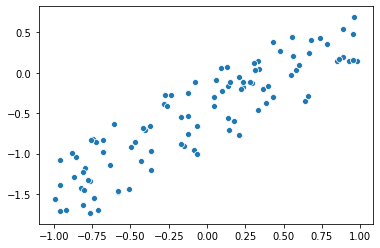

In [3]:
fig = sns.scatterplot(x=X_raw, y=y)

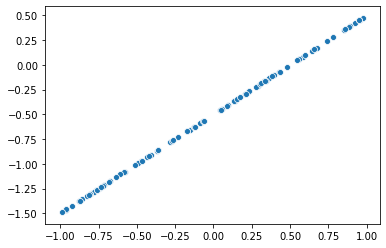

In [4]:
fig2 = sns.scatterplot(x=X_raw, y=y_true)

In [5]:
n_data = X_raw.shape[0]
dataset_x = np.concatenate([X_raw, X_raw])
dataset_y = np.concatenate([y, y_true])
dataset_category = ['sample'] * n_data + ['true'] * n_data

print(dataset_x.shape, dataset_y.shape)

(200,) (200,)


In [6]:
dataset = {
    'x': dataset_x,
    'y': dataset_y,
    'category': dataset_category
}

source = pd.DataFrame(dataset)
source.head()

,x,y,category
0,0.097627,-0.224556,sample
1,0.430379,-0.299613,sample
2,0.205527,-0.059279,sample
3,0.089766,0.051955,sample
4,-0.152690,-0.903937,sample


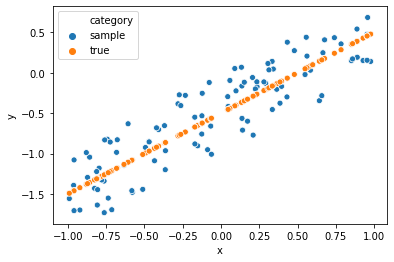

In [7]:
fig3 = sns.scatterplot(x='x', y='y', hue='category', data=source)

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

In [8]:
from sklearn.linear_model import LinearRegression

# Ordinary least squres Linear Regressuion
linear_regression = LinearRegression(fit_intercept=True)
# linear_regression.fit(X_raw, y)

In [9]:
# colume vector -> matrix
X = X_raw.reshape(-1,1)
linear_regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = linear_regression.predict(X)
training_error = (abs(y - y_pred)).sum()
mean_training_error = training_error / X.shape[0]

print(mean_training_error)

0.23709498511190305


In [11]:
dataset = {
    'x': np.concatenate([dataset_x, X_raw]),
    'y': np.concatenate([dataset_y, y_pred]),
    'category': dataset_category + ['prediction'] * n_data
}

source = pd.DataFrame(dataset)
source.tail()

,x,y,category
295,-0.633617,-1.087161,prediction
296,0.173026,-0.306108,prediction
297,-0.959785,-1.402981,prediction
298,0.657880,0.163365,prediction
299,-0.990609,-1.432827,prediction


In [12]:
source['category'].unique()

array(['sample', 'true', 'prediction'], dtype=object)

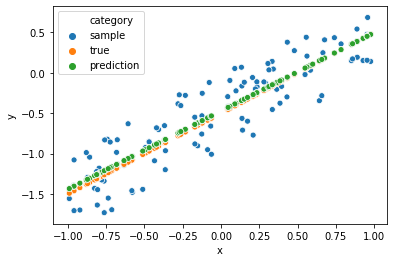

In [13]:
fig4 = sns.scatterplot(x='x', y='y', hue='category', data=source)

In [14]:
a_est = linear_regression.coef_
b_est = linear_regression.intercept_

print(f'a_est = {a_est}, type = {type(a_est)}, shape = {a_est.shape}')
print(f'b_est = {b_est:.3}, type = {type(b_est)}, shape = {b_est.shape}')

a_est = [0.96827553], type = <class 'numpy.ndarray'>, shape = (1,)
b_est = -0.474, type = <class 'numpy.float64'>, shape = ()
